In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 1. Load Data
file_path = 'data/train_FD001.txt'
col_names = ['unit_nr', 'cycles', 'os_1', 'os_2', 'os_3'] + ['s_{}'.format(i) for i in range(1, 22)]
df = pd.read_csv(file_path, sep='\s+', header=None, names=col_names)

# 2. Calculate RUL (This is what the AI will try to guess)
max_cycles = df.groupby('unit_nr')['cycles'].transform('max')
df['RUL'] = max_cycles - df['cycles']

# 3. Select Features
features = ['s_{}'.format(i) for i in range(1, 22)]
X = df[features]
y = df['RUL']

# 4. Split data (80% to learn, 20% to test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Data split and ready for training!")

✅ Data split and ready for training!


In [4]:
# 1. Initialize the Random Forest Regressor
# We use 100 trees to get a stable average prediction
model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)

print("Training the model... this may take a few seconds.")
model.fit(X_train, y_train)

# 2. Make Predictions on the test data
y_pred = model.predict(X_test)

# 3. Calculate the Error (RMSE)
# This tells us how many 'cycles' our prediction is off by on average
import numpy as np
from sklearn.metrics import mean_squared_error

# 1. Get the Mean Squared Error (MSE) first
mse = mean_squared_error(y_test, y_pred)

# 2. Take the square root to get RMSE
rmse = np.sqrt(mse)

print(f"✅ Training Complete!")
print(f"Average Error (RMSE): {rmse:.2f} cycles")

Training the model... this may take a few seconds.
✅ Training Complete!
Average Error (RMSE): 41.19 cycles


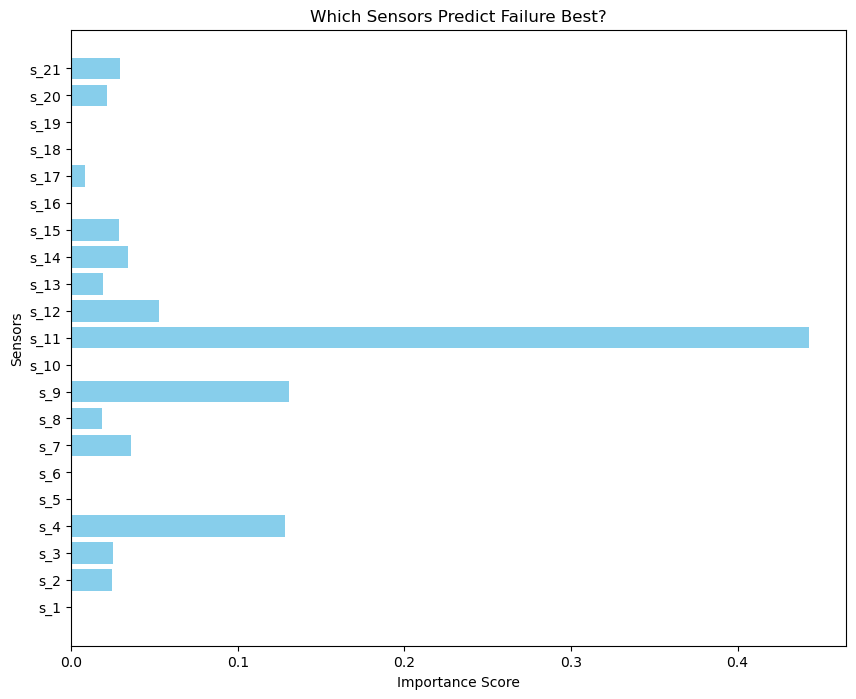

In [5]:
import matplotlib.pyplot as plt

# Get importance scores from the model
importances = model.feature_importances_
feature_names = features

# Create a bar chart
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Sensors")
plt.title("Which Sensors Predict Failure Best?")
plt.show()

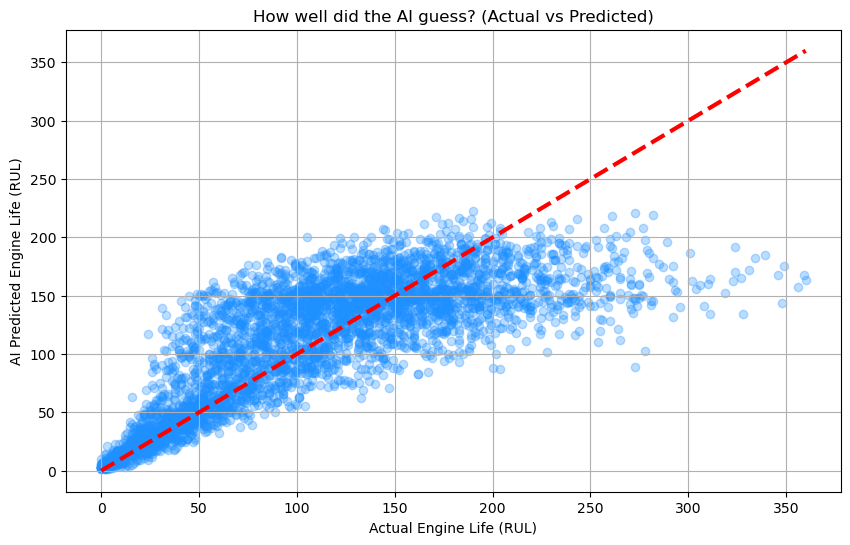

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='dodgerblue')

# Draw the 'Perfect Prediction' line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=3, linestyle='--')

plt.xlabel('Actual Engine Life (RUL)')
plt.ylabel('AI Predicted Engine Life (RUL)')
plt.title('How well did the AI guess? (Actual vs Predicted)')
plt.grid(True)
plt.show()

In [8]:
import joblib

# Use compress=3 (or up to 9) to shrink the file size
joblib.dump(model, 'engine_model.pkl', compress=3)

print("✅ Compressed model saved! Check the file size now.")

✅ Compressed model saved! Check the file size now.
